(-0.5, 3887.5, 2591.5, -0.5)

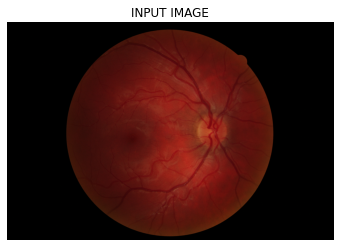

In [10]:
#Input image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('18_good.JPG')
plt.imshow(image);
plt.title('INPUT IMAGE')
plt.axis('off')

(-0.5, 3887.5, 2591.5, -0.5)

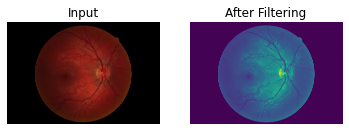

In [14]:
#Apply Euler Remapping and Gaussian Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

blur = cv2.GaussianBlur(image,(5,5),0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) #convert to grayscale
plt.subplot(121)
plt.imshow(image)
plt.title('Input')
plt.axis('off')#to remove plot values

plt.subplot(122)
plt.imshow(gray)
plt.title('After Filtering')
plt.axis('off')#to remove plot values



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  app.launch_new_instance()


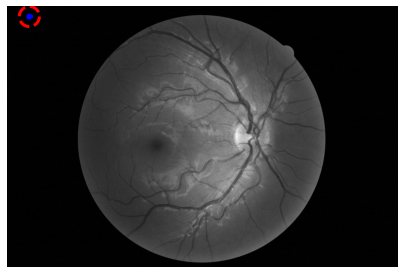

In [12]:
#Initial contour for introducing curves

#Reference: https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.active_contour
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(gray, 3),init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1],snake[:, 0], '-b', lw=3)

plt.axis('off')
plt.show()



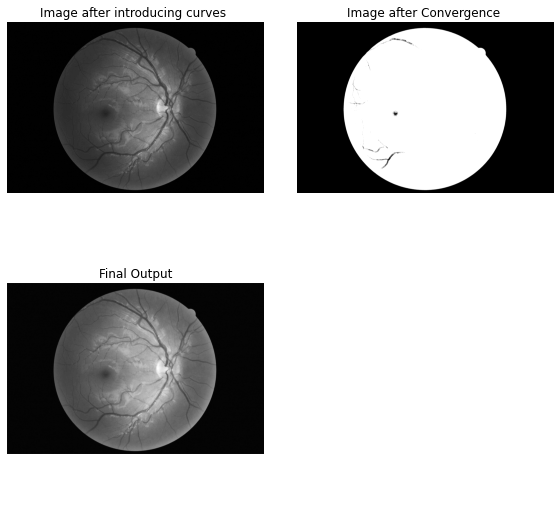

In [42]:
#active contour level set
#Reference:https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_chan_vese.html#sphx-glr-auto-examples-segmentation-plot-chan-vese-py

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese


fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(gray, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Image after introducing curves ", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Image after Convergence "
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Output", fontsize=12)


fig.tight_layout()

plt.axis('off')
plt.show()

